https://drive.google.com/drive/folders/1oPqRIYhcNYlcNpphe7c1wGKTfB8cQVt6?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/CSE4020_ML

/content/gdrive/My Drive/CSE4020_ML


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Task 1 - Heart Disease Dataset

In [5]:
data = pd.read_csv('heart.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
print(data_imputed.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [9]:
X = data_imputed.iloc[:, :-1]
y = data_imputed['TenYearCHD']

In [12]:
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
pca = PCA(n_components=3) #initialize PCA object
pca_data = pca.fit_transform(X)

df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

if want to include all pca components:



```
pca = PCA(n_components=None)
pca_data = pca.fit_transform(data_imputed)
df_pca = pd.DataFrame(data=pca_data)
```



In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

Train SVM on original data

In [17]:
svm_orig = SVC()
svm_orig.fit(X_train_org, y_train_org)
y_pred_org = svm_orig.predict(X_test_org)

Train SVM on projected data

In [19]:
svm_pca = SVC()
svm_pca.fit(X_train, y_train)
y_pred_pca = svm_pca.predict(X_test)

In [21]:
acc_pca = accuracy_score(y_test, y_pred_pca)
acc_orig = accuracy_score(y_test_org, y_pred_org)
print('Accuracy with PCA:', acc_pca)
print('Accuracy with original data:', acc_orig)

Accuracy with PCA: 0.8537735849056604
Accuracy with original data: 0.8514150943396226


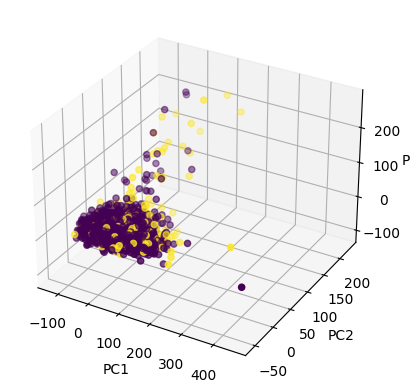

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=data['TenYearCHD'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

AttributeError: ignored

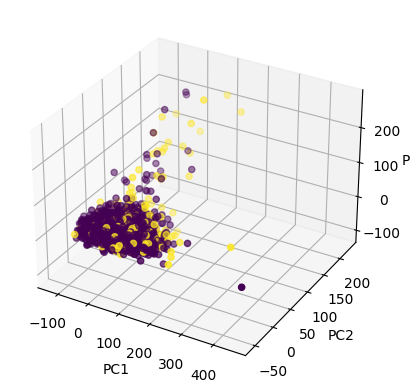

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=data['TenYearCHD'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

zz = lambda xx, yy: (-svm_pca.intercept_[0] - svm_pca.coef_[0][0] * xx - svm_pca.coef_[0][1] * yy) / svm_pca.coef_[0][2]
tmpx = np.linspace(4, 7, 20)
tmpy = np.linspace(2, 5, 20)
xx, yy = np.meshgrid(tmpx, tmpy)
ax.plot_surface(xx, yy, zz(xx, yy), cmap='Reds')

In [ ]:
# Create a meshgrid of x, y, and z values
x_min, x_max = df_pca['PC1'].min() - 1, df_pca['PC1'].max() + 1
y_min, y_max = df_pca['PC2'].min() - 1, df_pca['PC2'].max() + 1
z_min, z_max = df_pca['PC3'].min() - 1, df_pca['PC3'].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Predict the class labels for each point in the meshgrid
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot of the decision surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contourf(xx, yy, zz, Z, alpha=0.8)
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df['TenYearCHD'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Decision Boundary')
plt.show()

# Task 2 - Shop Dataset

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [31]:
df = pd.read_csv('shop.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [32]:
pca = PCA(n_components=3) # doesn't need one-hot encoding
pca_data = pca.fit_transform(df.iloc[:, 2:5])  #Selecting columns 2 to 4
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = clustering.fit_predict(df_pca)
df_pca['cluster'] = cluster_labels
# adds a new column to the df_pca DataFrame called 'cluster', which contains the
#cluster labels assigned by the agglomerative clustering algorithm.

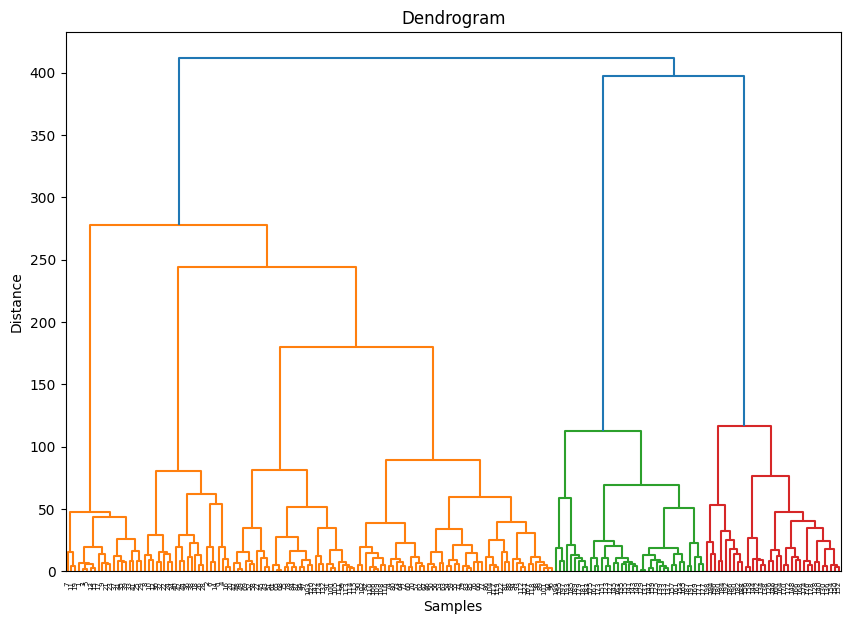

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a linkage matrix
linkage_matrix = linkage(pca_data, method='ward') #use pca_data bc need a matrix
#of numerical values not a DataFrame

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
rand_index = adjusted_rand_score(df['cluster'], df_pca['cluster'])
print('Rand Index:', rand_index)
#rand index gives similarity of clusters

Rand Index: 0.39368795095579434
